In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [2]:
#Loading the file
data=pd.read_csv("Data.csv")
#Displaying the dataset 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Removing the columns
data=data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [4]:
#Converting the categorical variables into indicator variables
data=pd.get_dummies(data,drop_first=True)

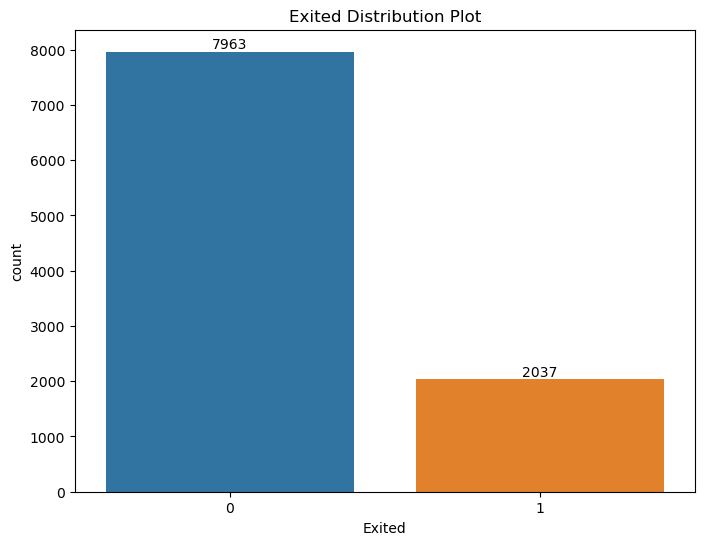

In [5]:
#Counting the occurrence of each exited user
exited_count=data["Exited"].value_counts()
#Displaying the exited distribution
plt.figure(figsize=(8,6))
ax=sns.countplot(x="Exited",data=data)
plt.title("Exited Distribution Plot")
for i,count in enumerate(exited_count):
    plt.text(i,count,str(count),horizontalalignment="center",verticalalignment="bottom")
plt.show()

In [6]:
#Splitting the dataset 
train,test=train_test_split(data,test_size=0.2)

In [7]:
#Extracting the feature and target variable for the training dataset
train_x=train.drop("Exited",axis=1)
train_y=train["Exited"]
#Extracting the feature and target variable for the testing dataset
test_x=test.drop("Exited",axis=1)
test_y=test["Exited"]

In [8]:
#Standardizing the feature
scaler=StandardScaler()
#Scaling the training feature
train_x_scaled=scaler.fit_transform(train_x)
#Scaling the testing feature 
test_x_scaled=scaler.transform(test_x)

In [9]:
#Setting threshold value
threshold=0.5
#Classifying the labels based on threshold
y_train_classified=[1 if value>threshold else 0 for value in train_y]
y_test_classified=[1 if value>threshold else 0 for value in test_y]

In [10]:
#Building the decision tree classifier model
model_1=DecisionTreeClassifier()
model_1.fit(train_x_scaled,y_train_classified)
#Displaying the testing accuracy
test_accuracy=(100*(model_1.score(test_x_scaled,y_test_classified)))
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 78.45%


In [11]:
#Building the logistic regression classifier model
model_2=LogisticRegression()
model_2.fit(train_x_scaled,y_train_classified)
#Displaying the testing accuracy
test_accuracy=(100*(model_2.score(test_x_scaled,y_test_classified)))
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 80.55%


In [12]:
#Building the k-nearest neighbors classifier model
model_3=KNeighborsClassifier()
model_3.fit(train_x_scaled,y_train_classified)
#Displaying the testing accuracy
test_accuracy=(100*(model_3.score(test_x_scaled,y_test_classified)))
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 81.90%


In [13]:
#Building the support vector classifier model
model_4=SVC()
model_4.fit(train_x_scaled,y_train_classified)
#Displaying the testing accuracy
test_accuracy=(100*(model_4.score(test_x_scaled,y_test_classified)))
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 84.95%


In [14]:
#Building the random tree classifier model
model_5=RandomForestClassifier()
model_5.fit(train_x_scaled,y_train_classified)
#Displaying the testing accuracy
test_accuracy=(100*(model_5.score(test_x_scaled,y_test_classified)))
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 85.20%


In [15]:
#Building the gradient boosting classifier model
model_6=GradientBoostingClassifier()
model_6.fit(train_x_scaled,y_train_classified)
#Displaying the testing accuracy
test_accuracy=(100*(model_6.score(test_x_scaled,y_test_classified)))
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 86.30%
